In [1]:
!pip install tensorflow
!pip install opencv-python
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tqdm import tqdm

In [2]:
class_names = ['dermatofibroma', 'squamous cell carcinoma', 'melanoma', 'Nevus pigmentous']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [3]:
def load_data():

    datasets = ['D:\\projects\\iomp\\train', 'D:\\projects\\iomp\\test']

    output = []

    for dataset in datasets:

        images = []
        labels = []

        print("Loading {}".format(dataset))

        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]

            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):

                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)

                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)

                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)

        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')

        output.append((images, labels))

    return output

In [4]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading D:\projects\iomp\train


100%|██████████| 181/181 [00:02<00:00, 65.82it/s]


Loading D:\projects\iomp\test


100%|██████████| 16/16 [00:00<00:00, 64.78it/s]


In [5]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [6]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 1071
Number of testing examples: 64
Each image is of size: (150, 150)


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming train_labels and test_labels contain integer class labels
train_counts = np.bincount(train_labels)
test_counts = np.bincount(test_labels)
print("Class names:", class_names)
print("Train counts:", train_counts)
print("Test counts:", test_counts)

Class names: ['dermatofibroma', 'squamous cell carcinoma', 'melanoma', 'Nevus pigmentous']
Train counts: [ 95 181 438 357]
Test counts: [16 16 16 16]


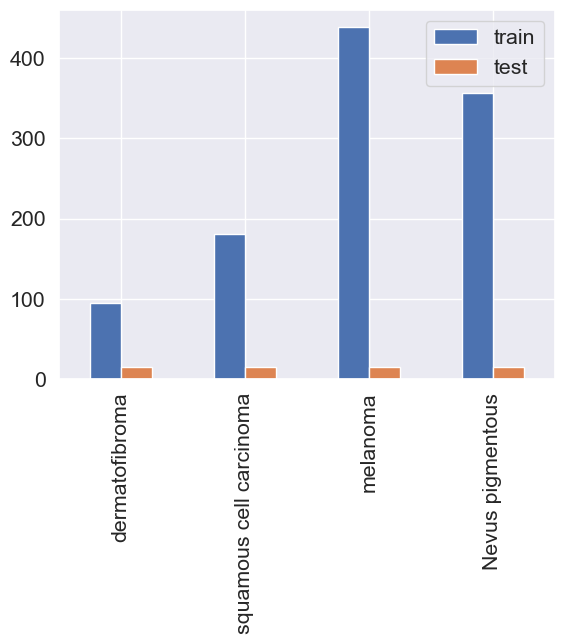

In [15]:
# Check if the lengths match and plot
if len(class_names) == len(train_counts) == len(test_counts):
    pd.DataFrame({'train': train_counts, 'test': test_counts}, index=class_names).plot.bar()
    plt.show()
else:
    print("Error: Number of classes does not match class_names length.")


In [17]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [19]:
def display_examples(class_names, images, labels):


    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=10)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

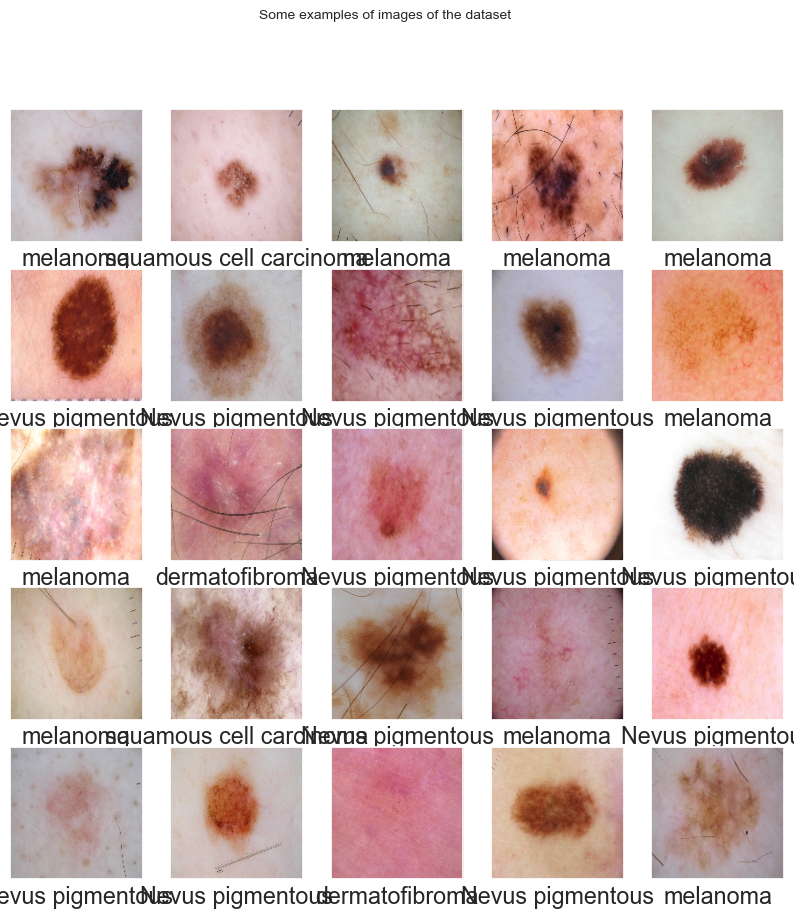

In [21]:
display_examples(class_names, train_images, train_labels)

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(5, activation=tf.nn.softmax)
])
model.summary()

C:\Users\manga\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     5,308,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,319,333 (20.29 MB)

 Trainable params: 5,319,333 (20.29 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=30, validation_split = 0.2)

Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 823ms/step - accuracy: 0.2310 - loss: 2.4802 - val_accuracy: 0.4186 - val_loss: 1.2525
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 739ms/step - accuracy: 0.4073 - loss: 1.2671 - val_accuracy: 0.4651 - val_loss: 1.1868
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 719ms/step - accuracy: 0.4637 - loss: 1.1819 - val_accuracy: 0.5488 - val_loss: 1.0794
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 728ms/step - accuracy: 0.5304 - loss: 1.0617 - val_accuracy: 0.5302 - val_loss: 0.9829
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 726ms/step - accuracy: 0.5639 - loss: 0.9551 - val_accuracy: 0.6186 - val_loss: 0.8893
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 718ms/step - accuracy: 0.6036 - loss: 0.9176 - val_accuracy: 0.5628 - val_loss: 1.0265
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 723ms/step - accuracy: 0.5738 - loss: 0.9641 - val_accuracy: 0.6465 - val_loss: 0.8468
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 715ms/step - accuracy: 0.6327 - loss: 0.8149 - val_accuracy: 0.5302 - val_loss:

In [39]:
test_loss = model.evaluate(test_images, test_labels)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.8542 - loss: 0.5602


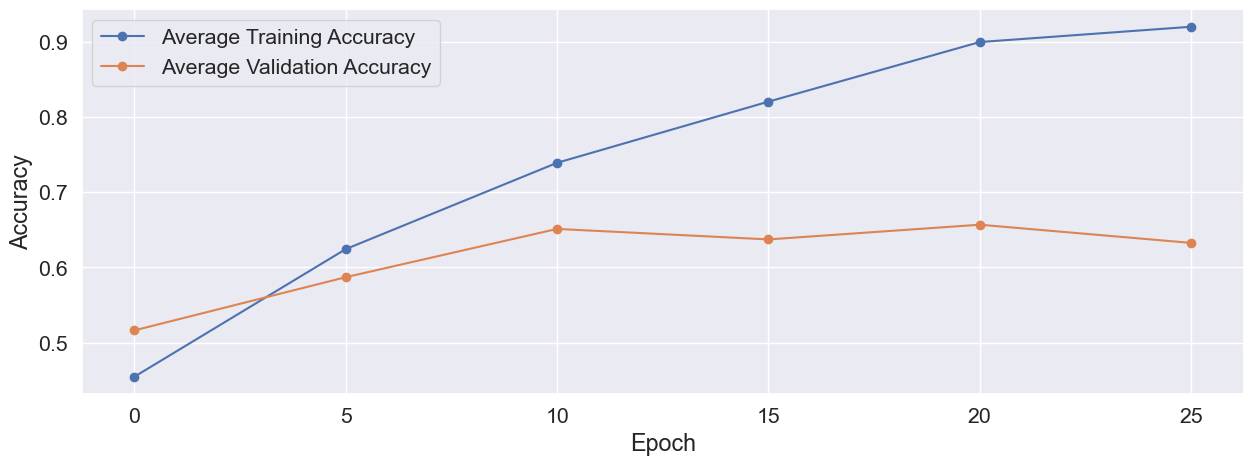

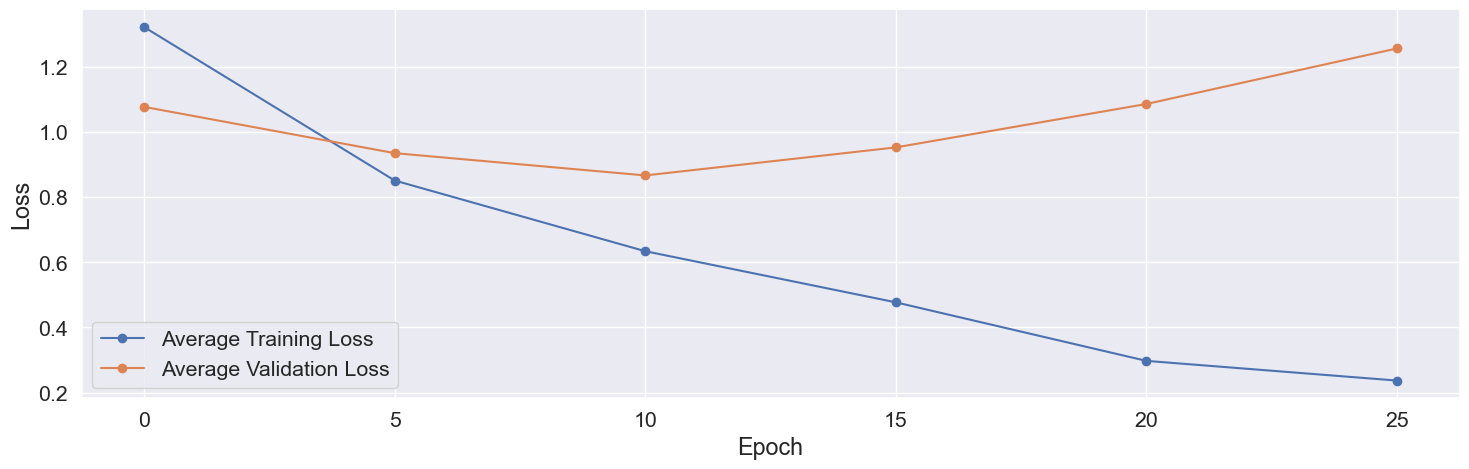

In [41]:
import numpy as np

# Calculate average accuracy for every 5 epochs
avg_train_acc = [np.mean(history.history['accuracy'][i:i+5]) for i in range(0, len(history.history['accuracy']), 5)]
avg_val_acc = [np.mean(history.history['val_accuracy'][i:i+5]) for i in range(0, len(history.history['val_accuracy']), 5)]

# Plot average accuracy
plt.figure(figsize=(15,5))
plt.plot(avg_train_acc, marker='o')
plt.plot(avg_val_acc, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Average Training Accuracy', 'Average Validation Accuracy'])
plt.xticks(np.arange(0, len(avg_train_acc)), np.arange(0, len(avg_train_acc)) * 5)
plt.grid(True)
plt.show()
import numpy as np

# Assuming 'history' contains the metrics for loss, precision, and recall

# Calculate average loss, precision, and recall for every 5 epochs
avg_train_loss = [np.mean(history.history['loss'][i:i+5]) for i in range(0, len(history.history['loss']), 5)]
avg_val_loss = [np.mean(history.history['val_loss'][i:i+5]) for i in range(0, len(history.history['val_loss']), 5)]

# Plot average loss
plt.figure(figsize=(15,5))
plt.plot(avg_train_loss, marker='o')
plt.plot(avg_val_loss, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Average Training Loss', 'Average Validation Loss'])
plt.xticks(np.arange(0, len(avg_train_loss)), np.arange(0, len(avg_train_loss)) * 5)
plt.grid(True)

plt.tight_layout()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


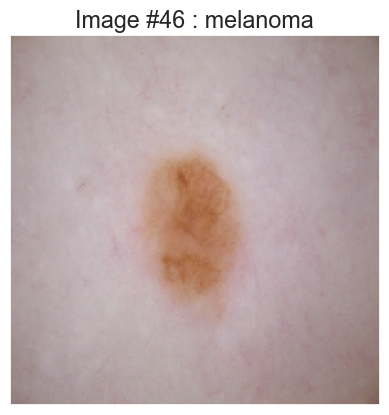

In [43]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability


index = np.random.randint(test_images.shape[0])
plt.figure()
plt.imshow(test_images[index])
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('Image #{} : '.format(index) + class_names[pred_labels[index]])
plt.show()

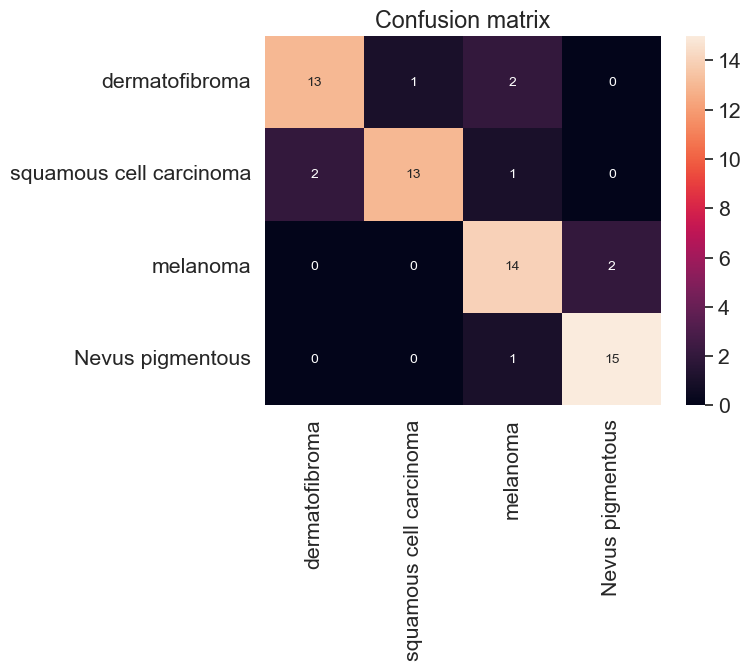

In [45]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True,
           annot_kws={"size": 10},
           xticklabels=class_names,
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [47]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Precision
precision = precision_score(test_labels, pred_labels, average='weighted')
print("Precision: {:.2f}".format(precision))

# Recall
recall = recall_score(test_labels, pred_labels, average='weighted')
print("Recall: {:.2f}".format(recall))

# F1 Score
f1 = f1_score(test_labels, pred_labels, average='weighted')
print("F1 Score: {:.2f}".format(f1))

# Accuracy
accuracy = accuracy_score(test_labels, pred_labels)
print("Accuracy: {:.2f}".format(accuracy))


Precision: 0.86
Recall: 0.86
F1 Score: 0.86
Accuracy: 0.86
